# Step 1: Data Ingestion

In [1]:
import numpy as np
import pandas as pd
import os
import pathlib

# data viz
from matplotlib import pyplot as plt
import seaborn as sns           # for nicer plots
sns.set(style="darkgrid")       # default style

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTENC


In [2]:
notebook_dir = pathlib.Path(os.getcwd()) 
csvdir_path = notebook_dir.parent / "data" / "external" 
file_name = "FPA_FOD_Plus.csv"
file_path = f"{csvdir_path}/{file_name}"

In [3]:
df_init = pd.read_csv(file_path)

/var/folders/l5/nv1yy17503b71cs9y247p65w0000gn/T/ipykernel_20545/477084150.py:1: DtypeWarning: Columns (9,11,13,14,15,16,17,52,53,60,62,63,64,307) have mixed types. Specify dtype option on import or set low_memory=False.
  df_init = pd.read_csv(file_path)


In [4]:
# 1. how many columns does the dataset contain?
print(f"The number of columns in the dataset: {df_init.shape[1]}")

# 2. how many rows are there in the dataset?
print(f"The number of rows in the dataset: {df_init.shape[0]}")

The number of columns in the dataset: 308
The number of rows in the dataset: 2302521


In [5]:
# drop columns that have the number of missing values greater than 80%
cutoff_missing_values = df_init.shape[0]*0.8
missing_vals = df_init.isna().sum().sort_values(ascending=False)
cols_missing_gt80pct = list(missing_vals[missing_vals > cutoff_missing_values].index)
df = df_init.drop(columns=cols_missing_gt80pct)

### Getting to know the data

In [6]:
# 1. how many columns does the dataset contain?
print(f"The number of columns in the dataset: {df.shape[1]}")

# 2. how many rows are there in the dataset?
print(f"The number of rows in the dataset: {df.shape[0]}")

# 3. what are the column names?
print(f"Column names int the dataset: {list(df.columns)}")

The number of columns in the dataset: 286
The number of rows in the dataset: 2302521
Column names int the dataset: ['FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'LatLong_State', 'LatLong_County', 'NPL', 'Mang_Type', 'Mang_Name', 'Des_Tp', 'GAP_Sts', 'GAP_Prity', 'EVH', 'EVT', 'EVH_1km', 'EVT_1km', 'EVC', 'EVC_1km', 'NAME', 'MOD_NDVI_12m', 'MOD_EVI_12m', 'Land_Cover', 'Land_Cover_1km', 'rpms', 'rpms_1km', 'Population', 'Popo_1km', 'GACCAbbrev', 'GACC_PL', 'GACC_New fire', 'GACC_New LF', 'GACC_Uncont LF', 'GACC_Type 1 

In [7]:
# check for duplicates of id vars
print(f"Number of duplicates in FOD_ID: {df.FOD_ID.duplicated().sum()}")
print(f"Number of duplicates in FPA_ID: {df.FPA_ID.duplicated().sum()}")

Number of duplicates in FOD_ID: 64
Number of duplicates in FPA_ID: 0


In [8]:
cols_show = ['FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE']
df[df.FOD_ID.duplicated(keep=False)][cols_show].sort_values(by=['FOD_ID', 'FPA_ID']).head(8)

,FOD_ID,FPA_ID,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,LATITUDE,LONGITUDE
1953439,400632894,ICS209_2019_10664126,IA-ICS209,FS,OK 742,2019,2019-03-20,79,32.939277,-87.329210
2194351,400632894,IRW-2020-AKSWS-004278,IA-IRWIN,ST/C&L,ANIAK RIVER,2020,2020-06-16,168,61.406390,-159.304009
1976222,400632895,ICS209_2019_10671249,IA-ICS209,ST/C&L,BURNOUT LANE (07),2019,2019-06-29,180,30.405556,-85.615000
2190116,400632895,IRW-2020-AKSWS-004127,IA-IRWIN,ST/C&L,DECOURCY MOUNTAIN,2020,2020-05-31,152,62.108317,-158.495323
1953301,400632897,ICS209_2019_10674072,IA-ICS209,DOD,WET POND,2019,2019-03-20,79,30.490000,-86.820000
2189624,400632897,IRW-2020-AKSWS-004126,IA-IRWIN,ST/C&L,SMITH CREEK,2020,2020-05-30,151,62.115333,-158.497256
1953576,400632898,ICS209_2019_10674112,IA-ICS209,DOD,NAME,2019,2019-03-21,80,30.450000,-86.770000
2195101,400632898,IRW-2020-AKSWS-004286,IA-IRWIN,ST/C&L,BLACK RIVER,2020,2020-06-18,170,62.485001,-156.176307


Note: FOD_ID are valid duplicates. The unique identifier in this data set is FPA_ID. There are no duplicates in FPA_ID.

### Choosing the prediction task

Use binning approach 4. Other approaches considered for target variables and binnings are available in `02-choose-trgt-and-preprocess-sa.ipynb` (or any `02-choose-trgt-and-preprocess-...-sa.ipynb` notebooks.) 

In [9]:
# binning approach 4 (from Nedim's code)
bins_04 = [0, 100, 4999, 29000, df.FIRE_SIZE.max()] 
fire_cats_04 = pd.cut(df.FIRE_SIZE, bins_04)
print(f"{fire_cats_04.value_counts()}")
print(f"\n{fire_cats_04.value_counts(normalize=True)}")

FIRE_SIZE
(0.0, 100.0]           2241807
(100.0, 4999.0]          55930
(4999.0, 29000.0]         3682
(29000.0, 662700.0]       1102
Name: count, dtype: int64

FIRE_SIZE
(0.0, 100.0]           0.973632
(100.0, 4999.0]        0.024291
(4999.0, 29000.0]      0.001599
(29000.0, 662700.0]    0.000479
Name: proportion, dtype: float64


`Bin using approach 4`

In [10]:
group_names = ['small', 'medium', 'large', 'very large']

df['FIRE_SIZE_LABEL'] = pd.cut(df.FIRE_SIZE, bins_04, labels=group_names)

In [11]:
df.FIRE_SIZE_LABEL.value_counts()

FIRE_SIZE_LABEL
small         2241807
medium          55930
large            3682
very large       1102
Name: count, dtype: int64

# Step 2: Data Preprocessing

`Recode target variable`

In [12]:
# recode fire_size_label  from string to numeric

firelabel_mapping = {
    'small': 0,
    'medium': 1,
    'large': 2,
    'very large': 3
}
print(f"{firelabel_mapping=}")

df['FIRE_SIZE_LABEL'] = df['FIRE_SIZE_LABEL'].map(firelabel_mapping)

firelabel_mapping={'small': 0, 'medium': 1, 'large': 2, 'very large': 3}


`Shuffle the dataset`

In [13]:
np.random.seed(207)

indices = list(range(df.shape[0]))               # create a list of indices corresponding to rows in the dataset
shuffled_indices = np.random.permutation(indices)
df = df.reindex(index=shuffled_indices)     # change the ordering of the df


`Create training, validation, and test datasets`

Using a 60/20/20 split

Approach: stratified random sampling, strata = FIRE_YEAR and FIRE_SIZE_LABEL

In [14]:
val_size = 0.2/(0.2 + 0.6)
df_train_main, df_test = train_test_split(df, test_size= 0.2, random_state=207,
                                           stratify=list(zip(df['FIRE_YEAR'], df['FIRE_SIZE_LABEL'])))
df_train, df_val = train_test_split(df_train_main, test_size=val_size, random_state=207,
                                     stratify=list(zip(df_train_main['FIRE_YEAR'], df_train_main['FIRE_SIZE_LABEL'])))

# print shapes
print(f"Shape of df_train: {df_train.shape}")
print(f"Shape of df_val: {df_val.shape}")
print(f"Shape of df_test: {df_test.shape}")

Shape of df_train: (1381512, 287)
Shape of df_val: (460504, 287)
Shape of df_test: (460505, 287)


`Identify features of interest`

In [15]:
# from FPA FOD data
trgt_feat_fod = ['FIRE_SIZE_LABEL', 'FIRE_YEAR', 'DISCOVERY_DOY', 'NWCG_CAUSE_CLASSIFICATION', 'LATITUDE', 'LONGITUDE', 'STATE']

# from GRIDMET: variables surround 5-day window centered on the fire discovery date
feat_gridmet = list(df_train.columns[df_train.columns.str.contains('_5D_')])

# from risk management assistance
feat_rmgmta = ['SDI']

# from fire stations
feat_firestation = ['No_FireStation_20.0km']

# from GACC
feat_gacc = ['GACC_PL']

# from global human modification
feat_ghm = ['GHM']

# from NDVI
feat_ndvi = ['NDVI-1day']      

# from national preparedness level
feat_npl = ['NPL']

# from social vulnerability index
feat_svi = ['EPL_PCI']

# from rangeland prod
feat_rangeland = ['rpms', 'rpms_1km']

In [16]:
# compile selected vars
trgt_feat_selected = trgt_feat_fod + feat_gridmet + feat_rmgmta + feat_firestation + feat_gacc + feat_ghm + feat_ndvi + feat_npl + feat_svi + feat_rangeland

In [17]:
# select only variables of interest (outcome and features)
df_train = df_train[trgt_feat_selected]
df_val = df_val[trgt_feat_selected]
df_test = df_test[trgt_feat_selected]

# print shapes
print(f"Shape of df_train: {df_train.shape}")
print(f"Shape of df_val: {df_val.shape}")
print(f"Shape of df_test: {df_test.shape}")

Shape of df_train: (1381512, 47)
Shape of df_val: (460504, 47)
Shape of df_test: (460505, 47)


`Clean features`

Handle missing values

In [18]:
# check for missing value
df_train.isna().sum().sort_values(ascending=False)

GACC_PL                      710061
EPL_PCI                       59194
NDVI-1day                     45802
pr_5D_max                     28684
th_5D_max                     28684
tmmn_5D_max                   28684
tmmx_5D_max                   28684
rmin_5D_min                   28684
rmax_5D_min                   28684
sph_5D_min                    28684
vs_5D_max                     28684
srad_5D_max                   28684
erc_5D_mean                   28684
etr_5D_max                    28684
fm100_5D_min                  28684
fm1000_5D_min                 28684
bi_5D_max                     28684
vpd_5D_max                    28684
erc_5D_max                    28684
pr_5D_min                     28684
bi_5D_mean                    28684
vpd_5D_mean                   28684
vs_5D_mean                    28684
pr_5D_mean                    28684
tmmn_5D_mean                  28684
tmmx_5D_mean                  28684
rmin_5D_mean                  28684
sph_5D_mean                 

Approach to imputing missing values: drop samples with any missing values

Other approaches considered are:

- A combination of zero and mean imputation (available at `02-choose-trgt-and-preprocess-imputemean-...-sa.ipynb` notebooks)
- KNN imputation (available at `02-choose-trgt-and-preprocess-imputeknn-smotenc-sa.ipynb` notebook)

In [19]:
# drop samples with missing values
df_train = df_train.dropna(axis=0, how='any')
df_val = df_val.dropna(axis=0, how='any')
df_test = df_test.dropna(axis=0, how='any')

# print shapes
print(f"Shape of df_train: {df_train.shape}")
print(f"Shape of df_val: {df_val.shape}")
print(f"Shape of df_test: {df_test.shape}")

Shape of df_train: (594060, 47)
Shape of df_val: (197991, 47)
Shape of df_test: (198261, 47)


In [20]:
# sanity check for missing value 
df_train.isna().sum().sort_values(ascending=False)

FIRE_SIZE_LABEL              0
bi_5D_max                    0
rmin_5D_min                  0
rmax_5D_min                  0
sph_5D_min                   0
vs_5D_max                    0
th_5D_max                    0
srad_5D_max                  0
etr_5D_max                   0
fm100_5D_min                 0
fm1000_5D_min                0
vpd_5D_max                   0
tmmn_5D_max                  0
erc_5D_max                   0
SDI                          0
No_FireStation_20.0km        0
GACC_PL                      0
GHM                          0
NDVI-1day                    0
NPL                          0
EPL_PCI                      0
rpms                         0
tmmx_5D_max                  0
pr_5D_max                    0
FIRE_YEAR                    0
rmax_5D_mean                 0
DISCOVERY_DOY                0
NWCG_CAUSE_CLASSIFICATION    0
LATITUDE                     0
LONGITUDE                    0
STATE                        0
pr_5D_mean                   0
tmmn_5D_

Clean NWCG_CAUSE_CLASSIFICATION variable

In [21]:
nwcg_cause_simplified = {
    'Human' : 'hum',
    'Natural' : 'nat',
    'Missing data/not specified/undetermined' : 'miss-unspec'
    
}

for data in [df_train, df_val, df_test]:
    data['NWCG_CAUSE_CLASSIFICATION'] = data['NWCG_CAUSE_CLASSIFICATION'].map(nwcg_cause_simplified)

In [22]:
df_train['NWCG_CAUSE_CLASSIFICATION'].value_counts(dropna=False) # sanity check

NWCG_CAUSE_CLASSIFICATION
hum            472914
nat             70170
miss-unspec     50976
Name: count, dtype: int64

`Address Class Imbalance`

Approach to address class imbalance: oversampling using SMOTENC.

Other approaches considered are:

- Undersampling (available at `02-choose-trgt-and-preprocess-imputemean-undersmpl-sa.ipynb`notebook)
- Oversampling using SMOTE (available at `02-choose-trgt-and-preprocess-imputemean-smote-sa.ipynb` notebook)

In [23]:
# define outcome
Y_train_tmp = df_train['FIRE_SIZE_LABEL']

# define features
features = list(df_train.columns)
features.remove('FIRE_SIZE_LABEL')
X_train_tmp = df_train[features]

# categorical features
cat_features = ['NWCG_CAUSE_CLASSIFICATION', 'GACC_PL', 'STATE']

In [24]:
print(f"Original class distribution, training data:\n{Y_train_tmp.value_counts()}")

Original class distribution, training data:
FIRE_SIZE_LABEL
0    578696
1     14278
2       854
3       232
Name: count, dtype: int64


In [25]:
# apply SMOTENC to the training data
smote_nc = SMOTENC(categorical_features=cat_features, random_state=207)
X_train_resampled, Y_train_resampled = smote_nc.fit_resample(X_train_tmp, Y_train_tmp)

print(f"Class distribution after SMOTENC, training data:\n{Y_train_resampled.value_counts()}")

Class distribution after SMOTENC, training data:
FIRE_SIZE_LABEL
0    578696
1    578696
2    578696
3    578696
Name: count, dtype: int64


In [26]:
print(f"Shape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of Y_train_resampled: {Y_train_resampled.shape}")

Shape of X_train_resampled: (2314784, 46)
Shape of Y_train_resampled: (2314784,)


In [27]:
# reassemble training dataset
df_train_resampled_init = pd.concat([Y_train_resampled, X_train_resampled], axis=1)

print(f"Shape of df_train_resampled: {df_train_resampled_init.shape}")

Shape of df_train_resampled: (2314784, 47)


`Add features`

One-hot-encoding

In [28]:
cols_onehot = ['NWCG_CAUSE_CLASSIFICATION', 'GACC_PL', 'STATE']
df_train_resampled = pd.get_dummies(df_train_resampled_init, columns=cols_onehot)
df_val = pd.get_dummies(df_val, columns=cols_onehot)
df_test = pd.get_dummies(df_test, columns=cols_onehot)

`Define outcome and features`

In [29]:
# define outcome
Y_train_resampled = df_train_resampled['FIRE_SIZE_LABEL']
Y_val = df_val['FIRE_SIZE_LABEL']
Y_test = df_test['FIRE_SIZE_LABEL']

print(f"Shape of Y_train: {Y_train_resampled.shape}")
print(f"Shape of Y_val: {Y_val.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of Y_train: (2314784,)
Shape of Y_val: (197991,)
Shape of Y_test: (198261,)


In [30]:
# define features
features = list(df_train_resampled.columns)
print(f"Number of items in features before removing outcome: {len(features)}")
features.remove('FIRE_SIZE_LABEL')
print(f"Number of items in features before removing outcome: {len(features)}")
print(f"{features=}")

X_train_resampled = df_train_resampled[features]
X_val = df_val[features]
X_test = df_test[features]

print(f"\nShape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of X_test: {X_test.shape}")

Number of items in features before removing outcome: 101
Number of items in features before removing outcome: 100
features=['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE', 'pr_5D_mean', 'tmmn_5D_mean', 'tmmx_5D_mean', 'rmin_5D_mean', 'rmax_5D_mean', 'sph_5D_mean', 'vs_5D_mean', 'th_5D_mean', 'srad_5D_mean', 'etr_5D_mean', 'fm100_5D_mean', 'fm1000_5D_mean', 'bi_5D_mean', 'vpd_5D_mean', 'erc_5D_mean', 'pr_5D_min', 'pr_5D_max', 'tmmn_5D_max', 'tmmx_5D_max', 'rmin_5D_min', 'rmax_5D_min', 'sph_5D_min', 'vs_5D_max', 'th_5D_max', 'srad_5D_max', 'etr_5D_max', 'fm100_5D_min', 'fm1000_5D_min', 'bi_5D_max', 'vpd_5D_max', 'erc_5D_max', 'SDI', 'No_FireStation_20.0km', 'GHM', 'NDVI-1day', 'NPL', 'EPL_PCI', 'rpms', 'rpms_1km', 'NWCG_CAUSE_CLASSIFICATION_hum', 'NWCG_CAUSE_CLASSIFICATION_miss-unspec', 'NWCG_CAUSE_CLASSIFICATION_nat', 'GACC_PL_1.0', 'GACC_PL_2.0', 'GACC_PL_3.0', 'GACC_PL_4.0', 'GACC_PL_5.0', 'STATE_AL', 'STATE_AR', 'STATE_AZ', 'STATE_CA', 'STATE_CO', 'STATE_CT', 'STATE_DC', 'STAT

`Standardized features`

In [31]:
# exclude one-hot-encoded vars from later standardization
cols_ncwg = list(X_train_resampled.columns[X_train_resampled.columns.str.contains('NWCG_CAUSE_CLASSIFICATION')])
cols_gacc = list(X_train_resampled.columns[X_train_resampled.columns.str.contains('GACC_PL')])
cols_state = list(X_train_resampled.columns[X_train_resampled.columns.str.contains('STATE')])
# cols_onehot = cols_ncwg + cols_gacc
cols_onehot = cols_ncwg + cols_gacc + cols_state
cols_continuous = [item for item in list(X_train_resampled.columns) if item not in cols_onehot]

X_train_res_continuous = X_train_resampled[cols_continuous]
X_train_res_onehot = X_train_resampled[cols_onehot]
X_val_continuous = X_val[cols_continuous]
X_val_onehot = X_val[cols_onehot]
X_test_continuous = X_test[cols_continuous]
X_test_onehot = X_test[cols_onehot]

# standardized continuous features
sc_x = StandardScaler()

X_train_res_cont_std = sc_x.fit(X_train_res_continuous).transform(X_train_res_continuous)
X_val_cont_std = sc_x.fit(X_train_res_continuous).transform(X_val_continuous)
X_test_cont_std = sc_x.fit(X_train_res_continuous).transform(X_test_continuous)

# add one-hot-encoded vars back 
X_train_res_std = np.concatenate((X_train_res_cont_std, X_train_res_onehot), axis= 1)
X_val_std = np.concatenate((X_val_cont_std, X_val_onehot), axis= 1)
X_test_std = np.concatenate((X_test_cont_std, X_test_onehot), axis= 1)


# Step 3: Exploratory Data Analysis (EDA)

`correlation matrix`

In [32]:
cols_cat = ['NWCG_CAUSE_CLASSIFICATION', 'GACC_PL', 'STATE']
df_train_eda = df_train.copy()
df_train_eda = pd.get_dummies(df_train_eda, columns=cols_cat)
corr_eda = df_train_eda.corr()

**Identify features that highly correlate with target variable**

In [33]:
# identify features with high correlation to FIRE_SIZE_LABEL
threshold = 0.05
corr_w_trgt = abs(corr_eda['FIRE_SIZE_LABEL'])
highest_corr_w_trgt = corr_w_trgt[corr_w_trgt>threshold]


print(f"Number of features highly correlated with FIRE_SIZE_LABEL (threshold of {threshold}): {len(highest_corr_w_trgt) - 1}")

print(f"\nAmong features highly correlated with FIRE_SIZEL_LABEL:")
print(f" * Max correlation value: {highest_corr_w_trgt[1:].max():.6f}")
print(f" * Mean correlation value: {highest_corr_w_trgt[1:].mean():.6f}")
print(f" * Min correlation value: {highest_corr_w_trgt[1:].min():.6f}")

print(f"\nThese features are:\n{highest_corr_w_trgt[1:]}")

Number of features highly correlated with FIRE_SIZE_LABEL (threshold of 0.05): 21

Among features highly correlated with FIRE_SIZEL_LABEL:
 * Max correlation value: 0.088568
 * Mean correlation value: 0.067690
 * Min correlation value: 0.050250

These features are:
LONGITUDE                        0.050250
rmin_5D_mean                     0.078229
rmax_5D_mean                     0.061379
etr_5D_mean                      0.065254
fm100_5D_mean                    0.067611
fm1000_5D_mean                   0.068389
bi_5D_mean                       0.076891
vpd_5D_mean                      0.055843
erc_5D_mean                      0.072611
rmin_5D_min                      0.070553
rmax_5D_min                      0.058675
etr_5D_max                       0.070404
fm100_5D_min                     0.065300
fm1000_5D_min                    0.067714
bi_5D_max                        0.088568
vpd_5D_max                       0.056964
erc_5D_max                       0.072236
No_FireStation_20.0k

In [34]:
# create correlation heatmap of features highly correlated with FIRE_SIZE_LABEL
subset = pd.DataFrame(highest_corr_w_trgt).index.tolist()
corr_filtered = corr_eda.loc[subset][subset]
corr_filtered.shape

(22, 22)

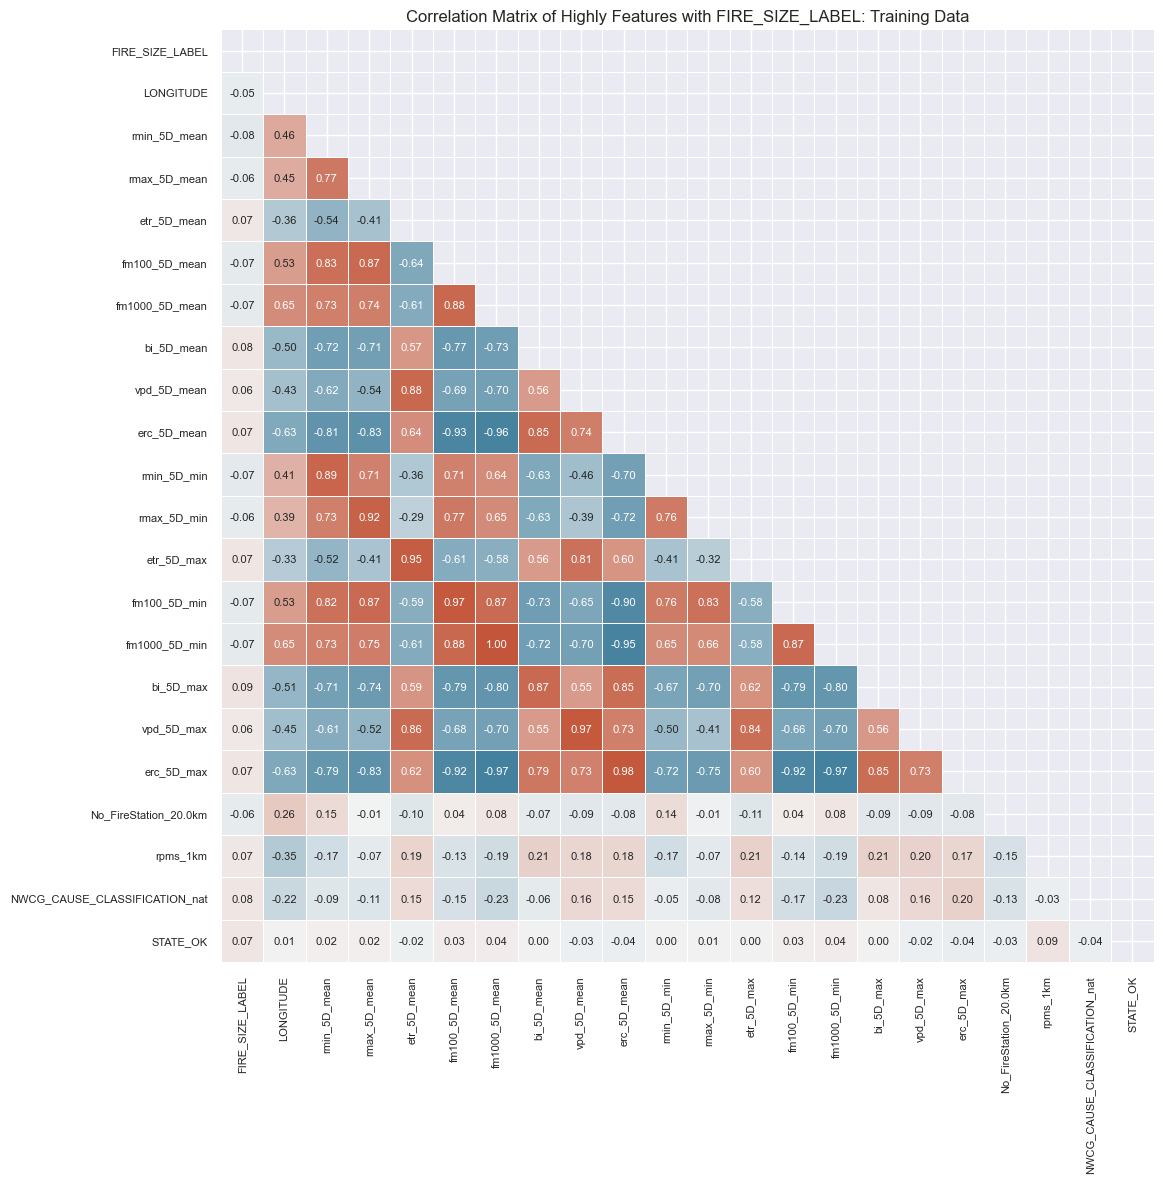

In [35]:
mask = np.triu(np.ones_like(corr_filtered, dtype=bool))      # generate a mask for the upper triangle
fig, ax = plt.subplots(figsize=(12,12))               # setup matplotlib figure
cmap = sns.diverging_palette(230,20, as_cmap=True)  # generate a custom diverging colormap
sns.heatmap(corr_filtered, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt=".2f", annot_kws={"size": 8}, cbar=False)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8) 
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8) 
ax.set_title("Correlation Matrix of Highly Features with FIRE_SIZE_LABEL: Training Data")
plt.tight_layout()
plt.show()

**Identify highly correlated features**

In [36]:
# identify highly correlated features
cols = corr_eda.columns.tolist()
high_corr_features = []
high_corr_details = []
for i in range(len(cols)):
    if cols[i] in high_corr_features:
        continue
    for j in range(i,len(cols)):
        if cols[j] in high_corr_features:
            continue
        if i != j:
            val = corr_eda.loc[cols[j]][cols[i]]
            if abs(val) > 0.7:
                high_corr_features.append(cols[j])
                corr_tuple = (cols[i], cols[j], val)
                high_corr_details.append(corr_tuple)

print(f"\nNumber of highly correlated features (threshold of 0.7): {len(high_corr_features)}")
print(f"\nThe highly correlation features are:")
for pair in high_corr_details:
   print(f"* {pair[0]} and {pair[1]}, r = {pair[2]:.2f}")


Number of highly correlated features (threshold of 0.7): 24

The highly correlation features are:
* pr_5D_mean and pr_5D_max, r = 0.95
* tmmn_5D_mean and tmmx_5D_mean, r = 0.93
* tmmn_5D_mean and sph_5D_mean, r = 0.84
* tmmn_5D_mean and etr_5D_mean, r = 0.72
* tmmn_5D_mean and vpd_5D_mean, r = 0.71
* tmmn_5D_mean and tmmn_5D_max, r = 0.96
* tmmn_5D_mean and tmmx_5D_max, r = 0.88
* tmmn_5D_mean and sph_5D_min, r = 0.82
* rmin_5D_mean and rmax_5D_mean, r = 0.77
* rmin_5D_mean and fm100_5D_mean, r = 0.83
* rmin_5D_mean and fm1000_5D_mean, r = 0.73
* rmin_5D_mean and bi_5D_mean, r = -0.72
* rmin_5D_mean and erc_5D_mean, r = -0.81
* rmin_5D_mean and rmin_5D_min, r = 0.89
* rmin_5D_mean and rmax_5D_min, r = 0.73
* rmin_5D_mean and fm100_5D_min, r = 0.82
* rmin_5D_mean and fm1000_5D_min, r = 0.73
* rmin_5D_mean and bi_5D_max, r = -0.71
* rmin_5D_mean and erc_5D_max, r = -0.79
* vs_5D_mean and vs_5D_max, r = 0.90
* th_5D_mean and th_5D_max, r = 0.71
* srad_5D_mean and srad_5D_max, r = 0.96
* 

`barplot of the target variable`

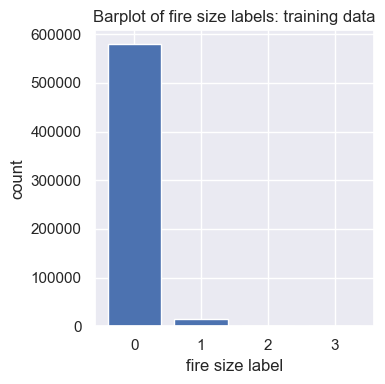

In [37]:
# prepare data for fire_size_label bar plot
fire_size_count = df_train_eda['FIRE_SIZE_LABEL'].value_counts()

fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.bar(fire_size_count.index, fire_size_count.values)
ax.set_xlabel('fire size label')
ax.set_ylabel('count')
ax.set_title('Barplot of fire size labels: training data')

plt.tight_layout()
plt.show()

`histograms and barplots of features`

**Histograms of numerical features**

In [38]:
features = list(df_train_eda.columns)
features.remove('FIRE_SIZE_LABEL')
features_numeric = [feat for feat in features if feat not in cols_onehot]

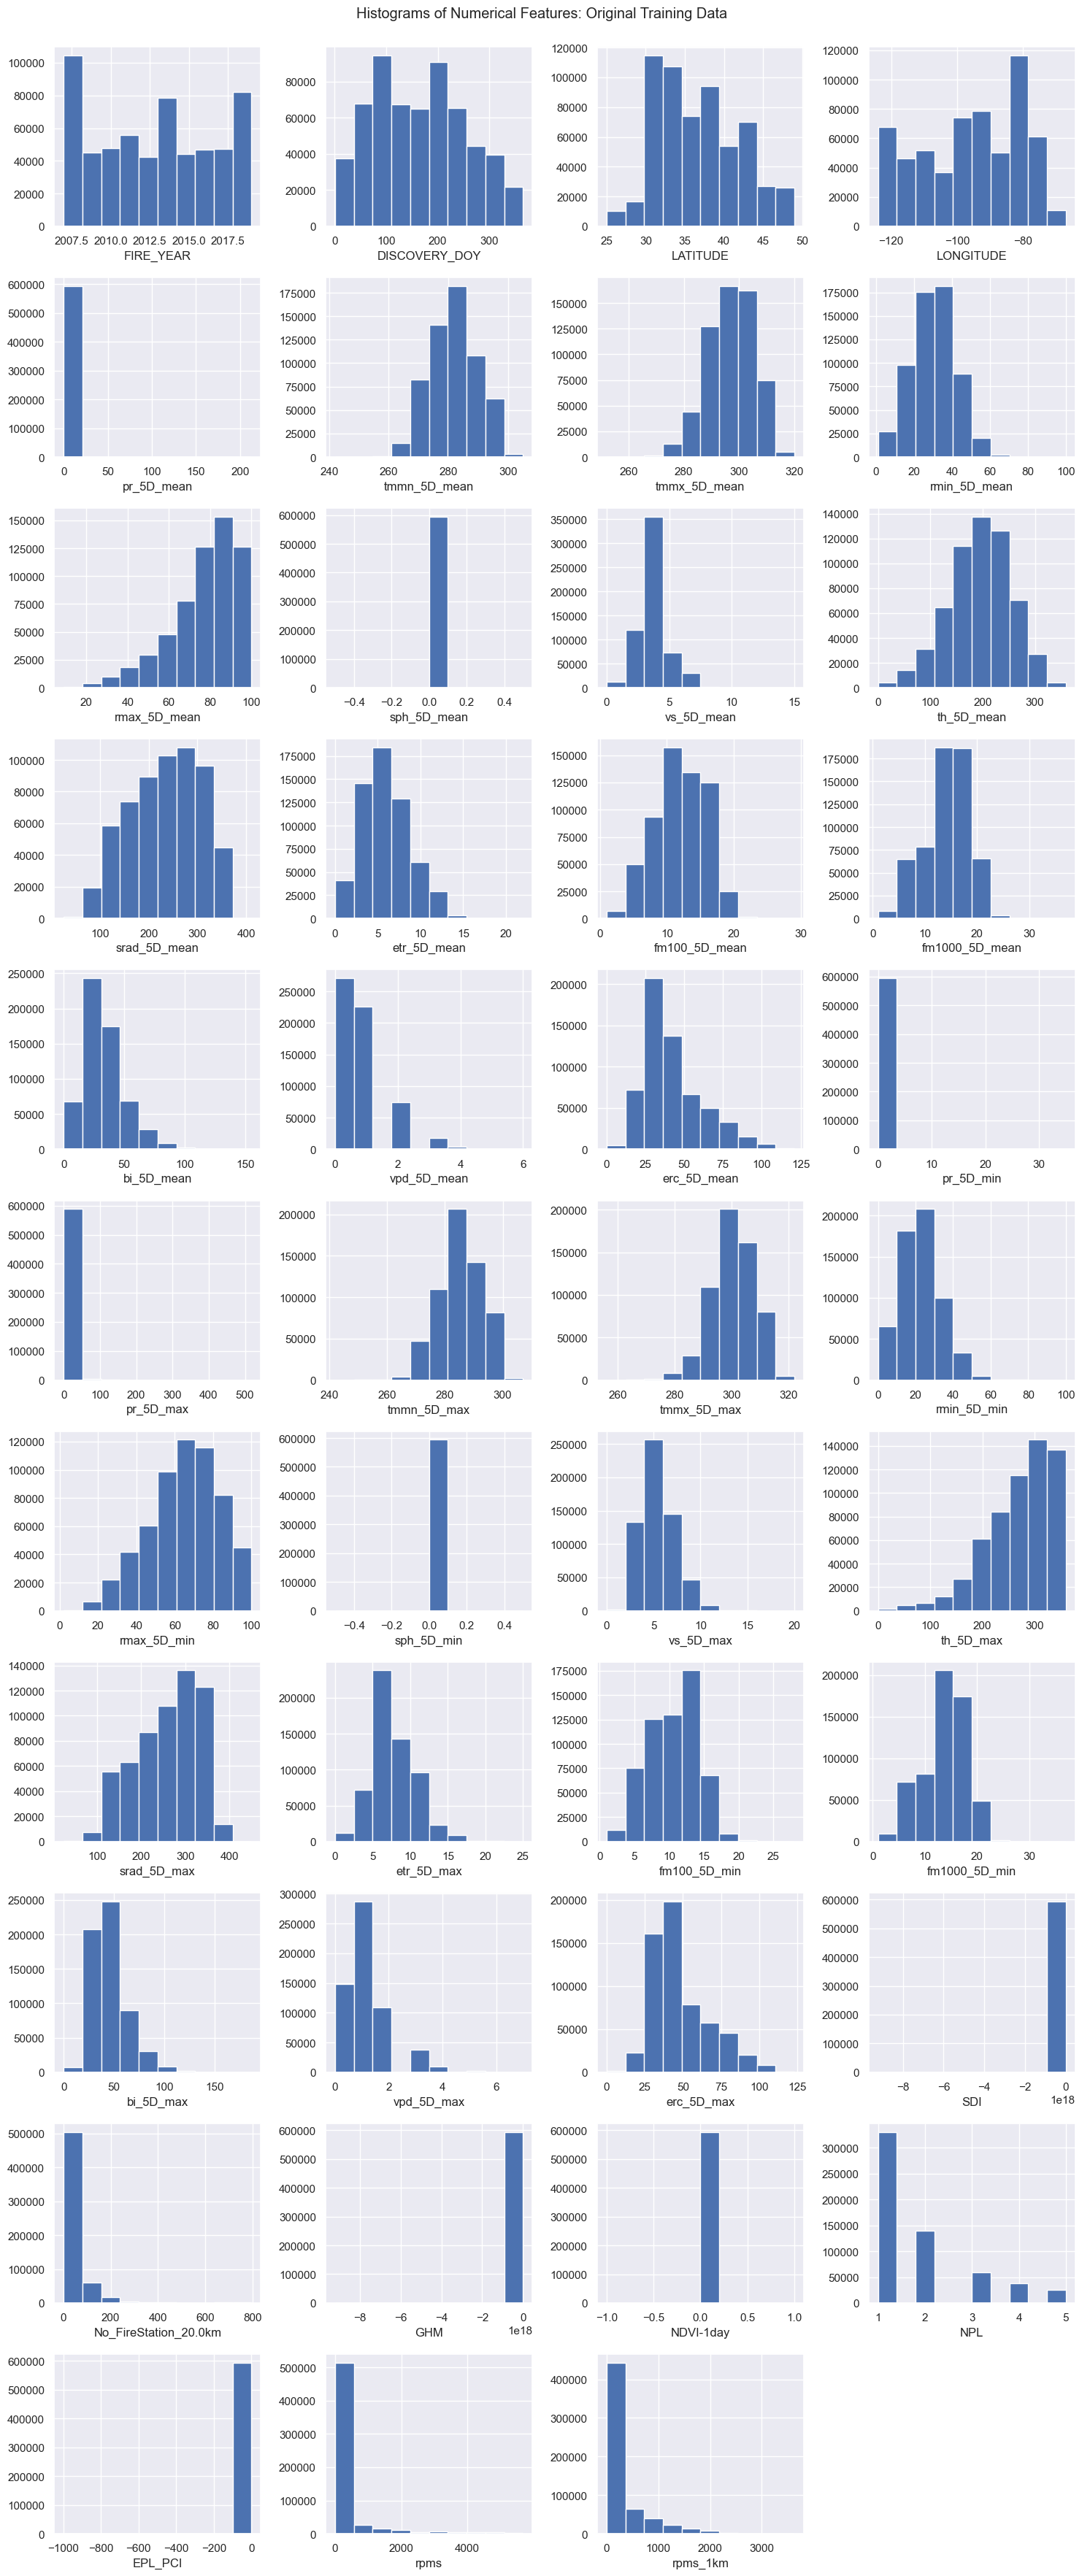

In [39]:
fig = plt.figure(figsize=(15,36))

for i in range(len(features_numeric)):
    ax = fig.add_subplot(11,4,i+1)
    ax.hist(df_train_eda[features_numeric[i]].astype(int))
    ax.set_xlabel(features_numeric[i])

plt.suptitle('Histograms of Numerical Features: Original Training Data')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**Barplots of categorical features**

In [40]:
cols_cat

['NWCG_CAUSE_CLASSIFICATION', 'GACC_PL', 'STATE']

In [41]:
df_train_cat = df_train[cols_cat]

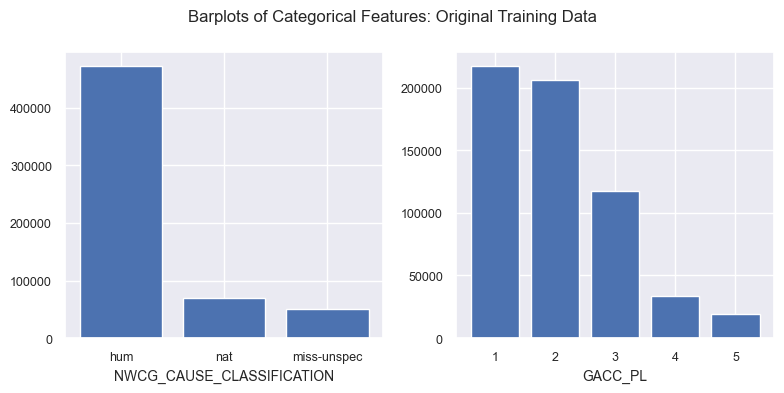

In [42]:
fig = plt.figure(figsize=(8,4))

for i in range(2):
    # prepare the data
    feat_count = df_train_cat[cols_cat[i]].value_counts()
    # create barplot
    ax = fig.add_subplot(1,2,i+1)
    ax.bar(feat_count.index, feat_count.values)
    ax.set_xlabel(cols_cat[i], fontsize=10)
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', labelsize=9)

plt.suptitle('Barplots of Categorical Features: Original Training Data', fontsize=12)
plt.tight_layout()
plt.show()

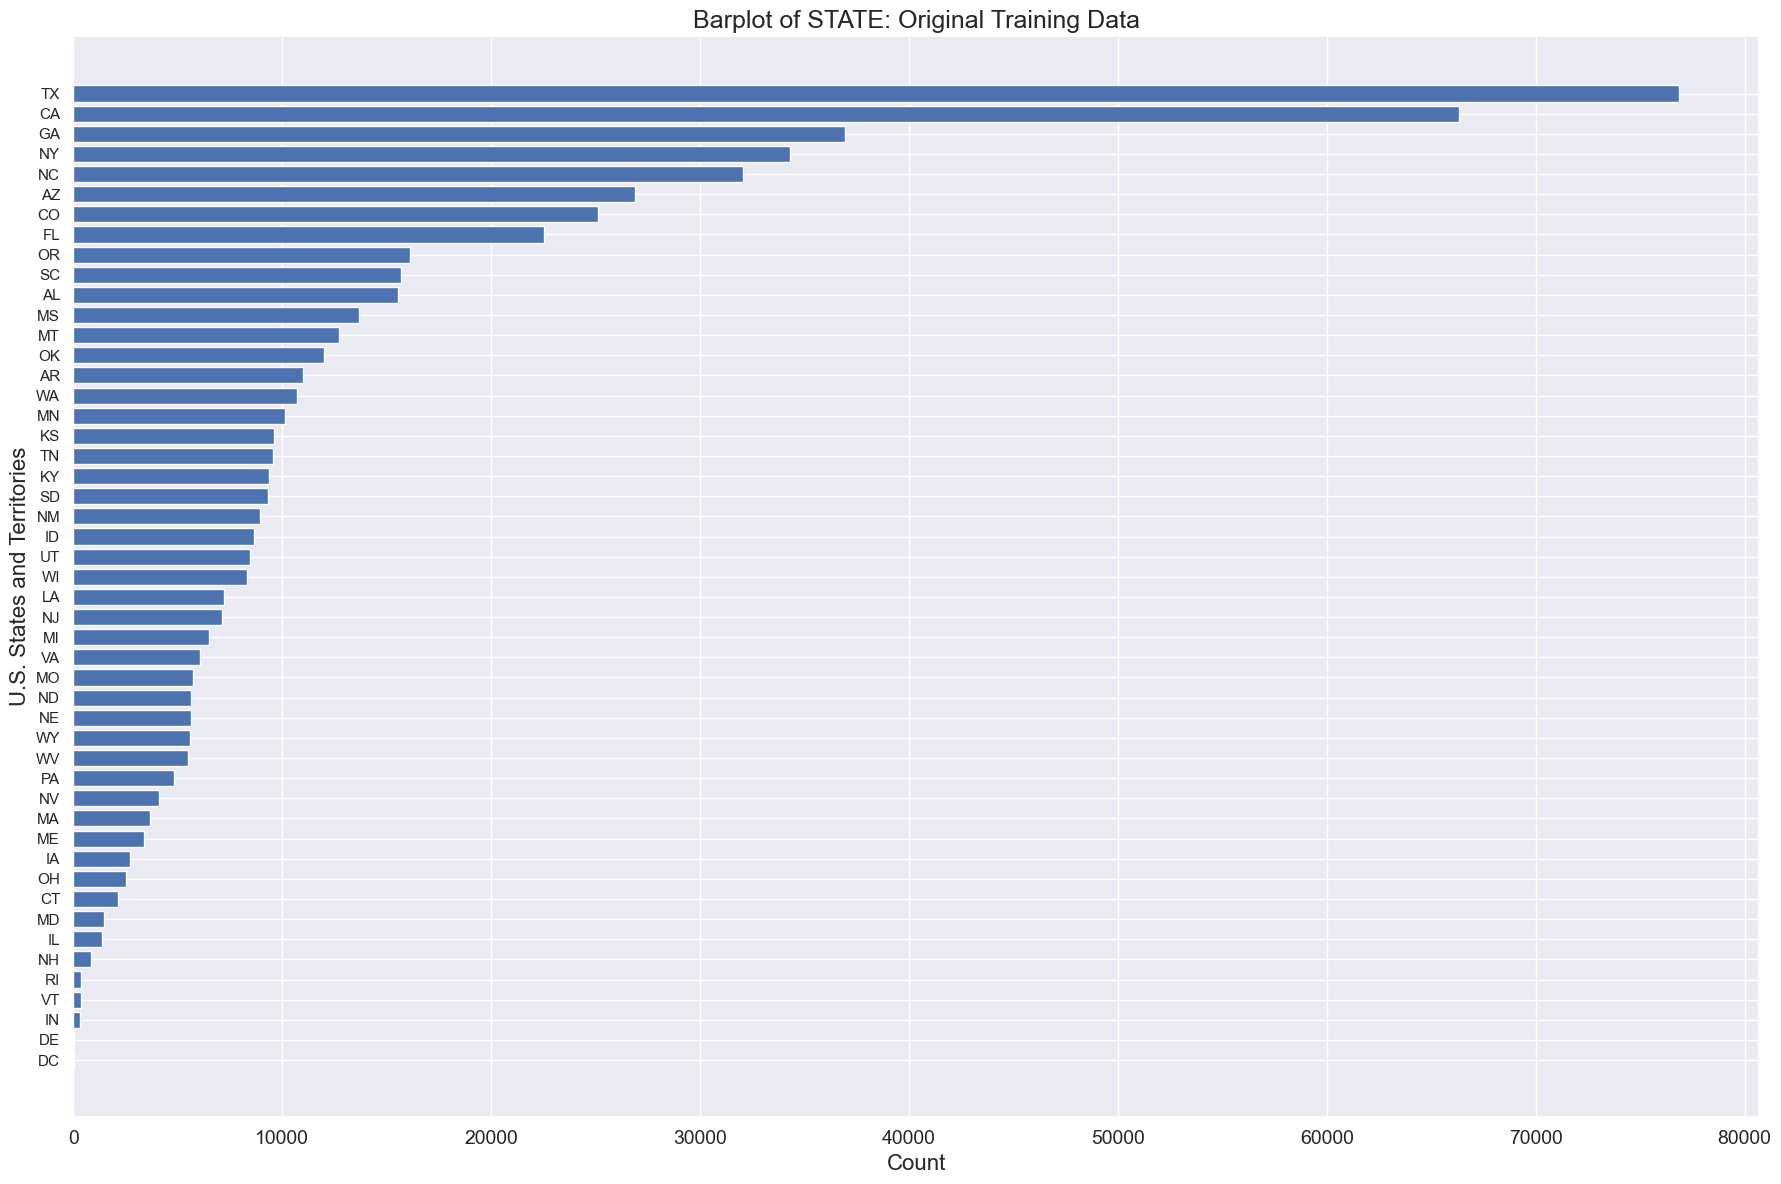

In [43]:
# prepare state data for bar plot
state_count = df_train_cat['STATE'].value_counts()

fig, ax = plt.subplots(1,1, figsize=(18,12))
ax.barh(state_count.index, state_count.values)
ax.invert_yaxis()
ax.set_ylabel('U.S. States and Territories', fontsize=16)
ax.set_xlabel('Count', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.set_title('Barplot of STATE: Original Training Data', fontsize=18)

plt.tight_layout()
plt.show()

# Step 4: Consider Feature Selection

In [44]:
df_train_fs = df_train.copy()

# encode categorical variables: 'NWCG_CAUSE_CLASSIFICATION', 'STATE'
# note: categorical var 'GACC_PL' is already encoded in numeric
nwcg_mapping = {'hum': 0, 'nat': 1, 'miss-unspec':2}
state_mapping = {cat: idx for idx, cat in enumerate(np.unique(df_train_fs.STATE))}

df_train_fs['NWCG_CAUSE_CLASSIFICATION'] = df_train_fs['NWCG_CAUSE_CLASSIFICATION'].map(nwcg_mapping)
df_train_fs['STATE'] = df_train_fs['STATE'].map(state_mapping)

#### Approach 1: Filter method - Pearson correlation

Identify features that highly correlated with target variable

In [45]:
def identify_highcorr_w_target(df, threshold=0.06):
    """Identify features with high correlation to FIRE_SIZE_LABEL
    
    Args:
    - df: data frame
    - threshod: minimum value of correlation to be considered highly correlated

    Return:
    - a list of highly correlated features
    
    """
    corr = df.corr()
    corr_w_trgt = abs(corr['FIRE_SIZE_LABEL'])
    highest_corr_w_trgt = corr_w_trgt[corr_w_trgt>threshold]

    print(f"Number of features highly correlated with FIRE_SIZE_LABEL (threshold of {threshold}): {len(highest_corr_w_trgt) - 1}")

    print(f"\nAmong features highly correlated with FIRE_SIZEL_LABEL:")
    print(f" * Max correlation value: {highest_corr_w_trgt[1:].max():.6f}")
    print(f" * Mean correlation value: {highest_corr_w_trgt[1:].mean():.6f}")
    print(f" * Min correlation value: {highest_corr_w_trgt[1:].min():.6f}")

    print(f"\nThese features are:\n{highest_corr_w_trgt[1:]}")

    feat_hcorr = highest_corr_w_trgt[1:]

    return list(feat_hcorr.index)

**1.1 On original distribution of target var (imbalanced)**

In [46]:
feat_hcorr_imb = identify_highcorr_w_target(df_train_fs)

Number of features highly correlated with FIRE_SIZE_LABEL (threshold of 0.06): 14

Among features highly correlated with FIRE_SIZEL_LABEL:
 * Max correlation value: 0.088568
 * Mean correlation value: 0.070756
 * Min correlation value: 0.061379

These features are:
rmin_5D_mean      0.078229
rmax_5D_mean      0.061379
etr_5D_mean       0.065254
fm100_5D_mean     0.067611
fm1000_5D_mean    0.068389
bi_5D_mean        0.076891
erc_5D_mean       0.072611
rmin_5D_min       0.070553
etr_5D_max        0.070404
fm100_5D_min      0.065300
fm1000_5D_min     0.067714
bi_5D_max         0.088568
erc_5D_max        0.072236
rpms_1km          0.065443
Name: FIRE_SIZE_LABEL, dtype: float64


**1.2 On resampled data (balanced)**

In [47]:
df_train_res_fs = df_train_resampled_init.copy()

# encode categorical variables: 'NWCG_CAUSE_CLASSIFICATION', 'STATE'
# note: categorical var 'GACC_PL' is already encoded in numeric
df_train_res_fs['NWCG_CAUSE_CLASSIFICATION'] = df_train_res_fs['NWCG_CAUSE_CLASSIFICATION'].map(nwcg_mapping)
df_train_res_fs['STATE'] = df_train_res_fs['STATE'].map(state_mapping)

In [48]:
feat_hcorr_res = identify_highcorr_w_target(df_train_res_fs)

Number of features highly correlated with FIRE_SIZE_LABEL (threshold of 0.06): 38

Among features highly correlated with FIRE_SIZEL_LABEL:
 * Max correlation value: 0.554018
 * Mean correlation value: 0.346945
 * Min correlation value: 0.073897

These features are:
DISCOVERY_DOY                0.149168
NWCG_CAUSE_CLASSIFICATION    0.307617
LATITUDE                     0.249542
LONGITUDE                    0.483813
pr_5D_mean                   0.232786
tmmn_5D_mean                 0.203790
tmmx_5D_mean                 0.337361
rmin_5D_mean                 0.494476
rmax_5D_mean                 0.503994
sph_5D_mean                  0.137384
vs_5D_mean                   0.073897
th_5D_mean                   0.115569
srad_5D_mean                 0.390343
etr_5D_mean                  0.457594
fm100_5D_mean                0.541356
fm1000_5D_mean               0.545171
bi_5D_mean                   0.478044
vpd_5D_mean                  0.436698
erc_5D_mean                  0.554018
pr_5D_max   

In [49]:
feat_hcorr_res_onehot = identify_highcorr_w_target(df_train_resampled)

Number of features highly correlated with FIRE_SIZE_LABEL (threshold of 0.06): 69

Among features highly correlated with FIRE_SIZEL_LABEL:
 * Max correlation value: 0.554018
 * Mean correlation value: 0.248080
 * Min correlation value: 0.060137

These features are:
DISCOVERY_DOY    0.149168
LATITUDE         0.249542
LONGITUDE        0.483813
pr_5D_mean       0.232786
tmmn_5D_mean     0.203790
                   ...   
STATE_TN         0.080733
STATE_TX         0.079013
STATE_WA         0.157940
STATE_WI         0.076964
STATE_WV         0.062107
Name: FIRE_SIZE_LABEL, Length: 69, dtype: float64


##### Approach 2: Random forest feature importance

**2.1 On original distribution of target var (imbalanced)**

In [50]:
# define outcome
Y_train_fs = df_train_fs['FIRE_SIZE_LABEL']

# define features
features_fs = list(df_train_fs.columns)
print(f"Number of items in features before removing outcome: {len(features_fs)}")
features_fs.remove('FIRE_SIZE_LABEL')
print(f"Number of items in features before removing outcome: {len(features_fs)}")

X_train_fs = df_train_fs[features_fs]

Number of items in features before removing outcome: 47
Number of items in features before removing outcome: 46


In [51]:
# fit random forest
rf_fs = RandomForestClassifier(random_state=207)
rf_fs.fit(X_train_fs, Y_train_fs)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
# retrieve feature importances and their standard deviation
importances_fs = rf_fs.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_fs.estimators_], axis=0)

In [53]:
# prepare data for plotting
rf_fs_importances = pd.DataFrame({'feature':features_fs, 'mdi_val': importances_fs, 'mdi_std': std}) 
rf_fs_importances_sorted = rf_fs_importances.sort_values(by='mdi_val', ascending=False)


In [54]:
def plot_feature_importance_mdi(df, data_desc = "Original training data"):
    """Plot feature importance from random forest classifier using MDI

    Args:
    - df: data frame with three columns (features, mdi_val, mdi_std)
    - data_desc: a string describing dataset

    Return: None
    """

    fig, ax = plt.subplots(1,1, figsize=(18,12))
    ax.barh(df.feature, df.mdi_val, xerr=df.mdi_std)
    ax.invert_yaxis()
    ax.set_xlabel("Mean decrease in impurity (MDI)", fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.set_ylabel("Feature", fontsize=16)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_title(f"Feature Importances Using MDI: {data_desc}", fontsize=18)

    plt.tight_layout()
    plt.show()

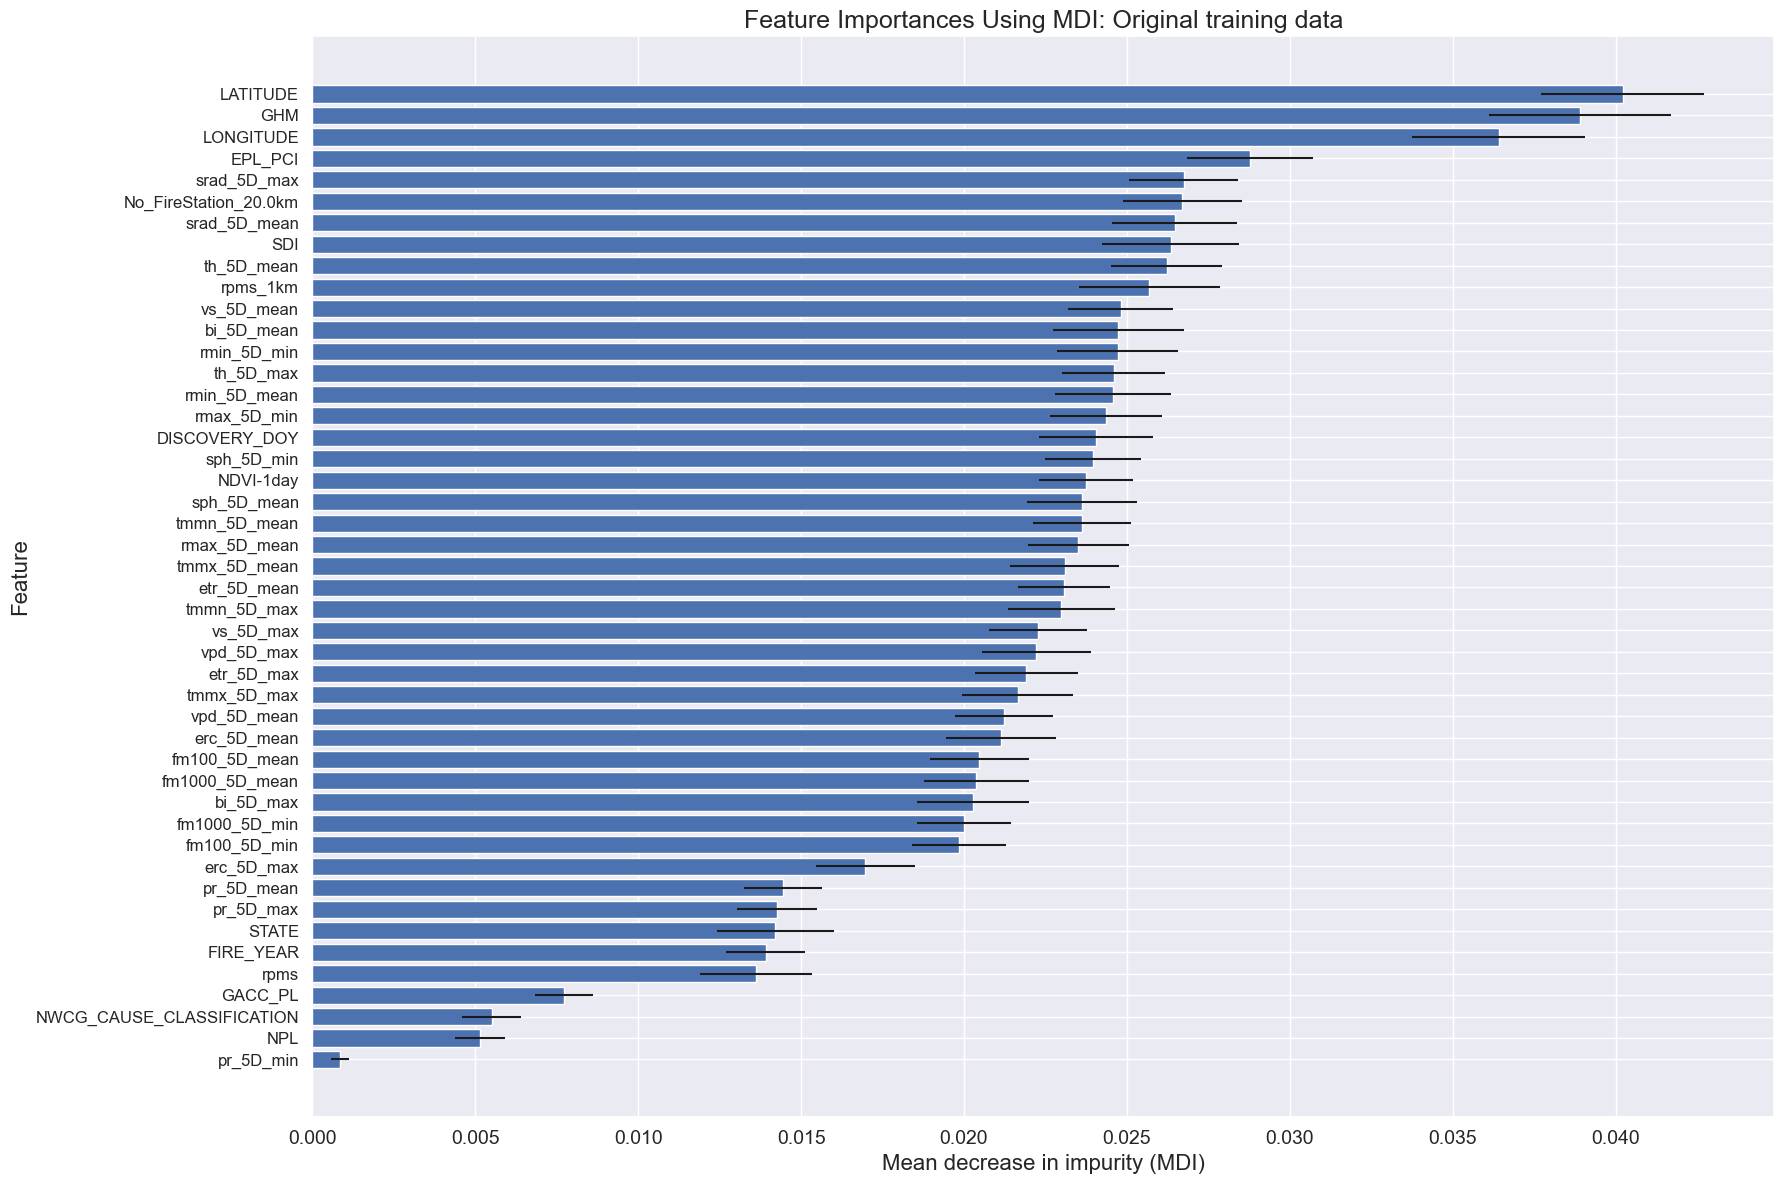

In [55]:
plot_feature_importance_mdi(rf_fs_importances_sorted)

**2.2 On resampled data (balanced)**

In [56]:
# define outcome
Y_train_res_fs = df_train_res_fs['FIRE_SIZE_LABEL']

# define features
features_res_fs = list(df_train_res_fs.columns)
print(f"Number of items in features before removing outcome: {len(features_res_fs)}")
features_res_fs.remove('FIRE_SIZE_LABEL')
print(f"Number of items in features before removing outcome: {len(features_res_fs)}")

X_train_res_fs = df_train_res_fs[features_res_fs]

Number of items in features before removing outcome: 47
Number of items in features before removing outcome: 46


In [57]:
# fit random forest
rf_res_fs = RandomForestClassifier(random_state=207)
rf_res_fs.fit(X_train_res_fs, Y_train_res_fs)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
# retrieve feature importances and their standard deviation
importances_res_fs = rf_res_fs.feature_importances_
std_res = np.std([tree.feature_importances_ for tree in rf_res_fs.estimators_], axis=0)

In [59]:
# prepare data for plotting
rf_res_fs_importances = pd.DataFrame({'feature':features_res_fs, 'mdi_val': importances_res_fs, 'mdi_std': std_res}) 
rf_res_fs_importances_sorted = rf_res_fs_importances.sort_values(by='mdi_val', ascending=False)

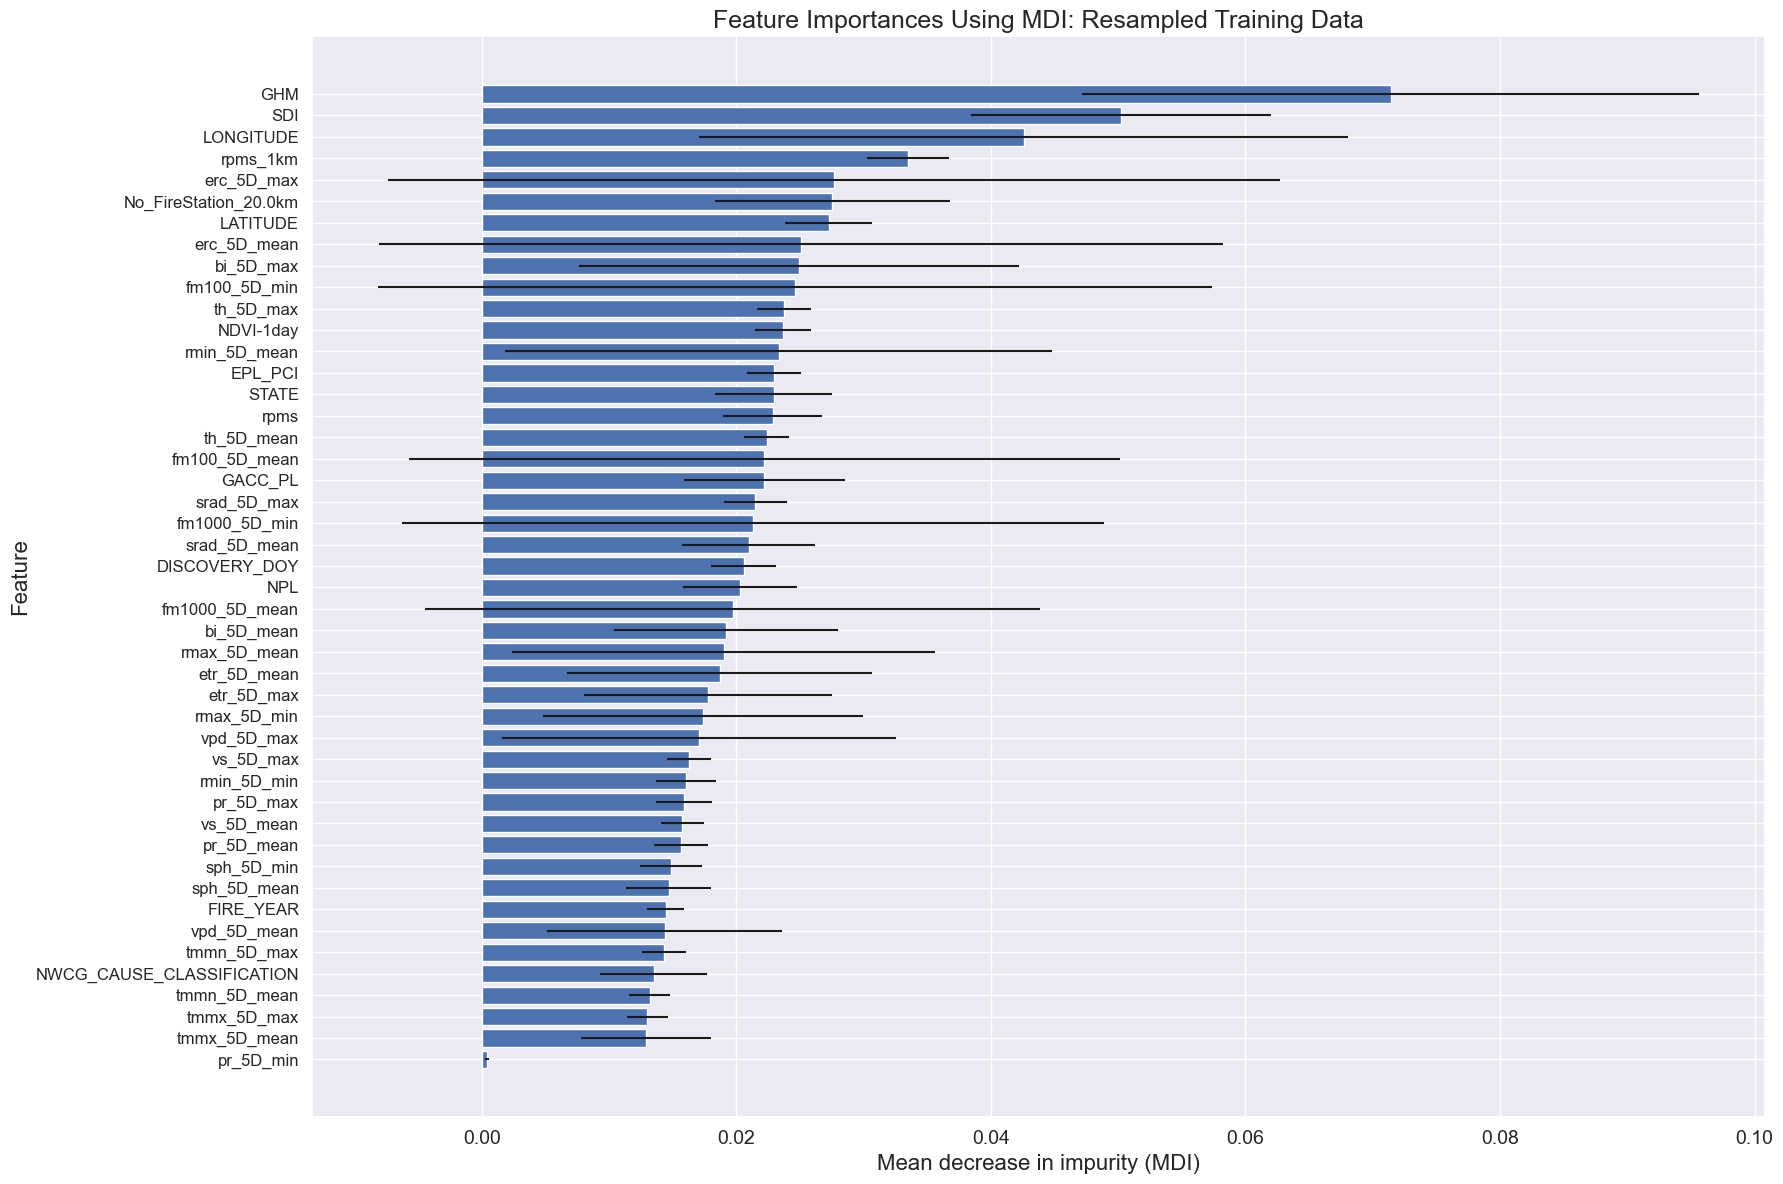

In [60]:
plot_feature_importance_mdi(rf_res_fs_importances_sorted, data_desc="Resampled Training Data")